In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder


parking_data = pd.read_csv("Downtown_Parking_Lots.csv")
target_column = 'TOTALSPACECOUNT'
X = parking_data.drop(columns=[target_column, 'NAME', 'ADDRESS', 'CREATIONDATE', 'LASTUPDATE', 'NOTES'])
y = parking_data[target_column]

Final_Dataframe=pd.DataFrame({
        'Model': [],
        'Mean Squared Error':[]
    } )
results_list=[]
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(exclude=['number']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Impute missing values for numeric columns
            ('scaler', StandardScaler())  # Standardize numeric features
        ]), numeric_features),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values for categorical columns
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), categorical_features)
    ]
)

# Impute missing values in the target variable
y = y.fillna(y.mean())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Append the regression model to the pipeline
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=42)),
    ('Random Forest Regressor', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Create a DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Mean Squared Error'])

# Iterate over models
for model_name, model in models:
    # Append the regression model to the pipeline
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train the model
    model_pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    
    # Evaluate the model using R-squared
    r_squared = model_pipeline.score(X_test, y_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))


    # Store results in the DataFrame
    # results_df=
    
    results_list.append({
        'Model': model_name,
        'Mean Squared Error': mse,
        'R-squared': r_squared,
        'RMSE': rmse

    })

# Concatenate the list of DataFrames into the Final_Dataframe
Final_Dataframe = pd.concat([Final_Dataframe, pd.DataFrame(results_list)], ignore_index=True)

# Display the results table
Final_Dataframe

,Model,Mean Squared Error,R-squared,RMSE
0,Linear Regression,217786.076843,0.257772,466.675558
1,Decision Tree Regressor,170623.334926,0.418506,413.065776
2,Random Forest Regressor,120456.156266,0.589478,347.067942
3,Gradient Boosting Regressor,125035.344309,0.573872,353.603371


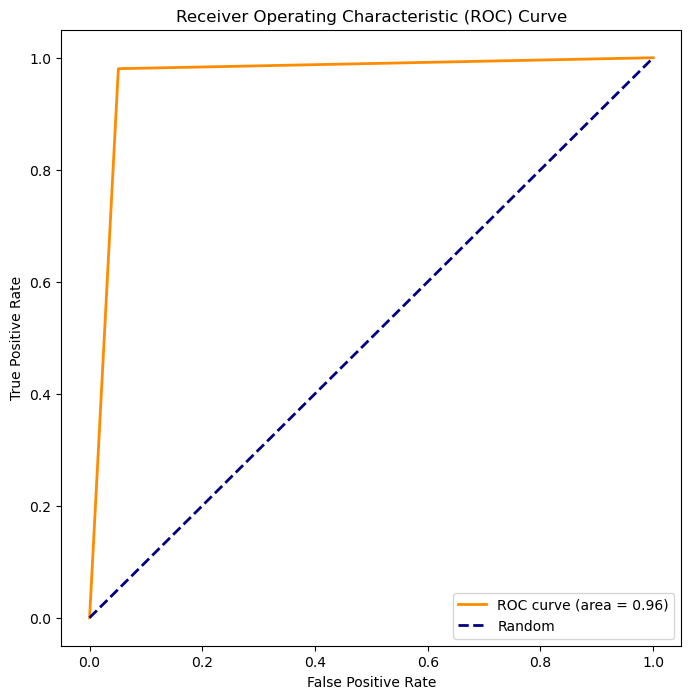

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate synthetic data for regression
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Convert the regression problem to a binary classification problem
# For example,  set a threshold to classify as positive or negative
threshold = 0.5
y_binary = (y > threshold).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get predicted values
y_pred = model.predict(X_test)

# Convert predicted values to binary predictions based on the threshold
y_binary_pred = (y_pred > threshold).astype(int)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_binary_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

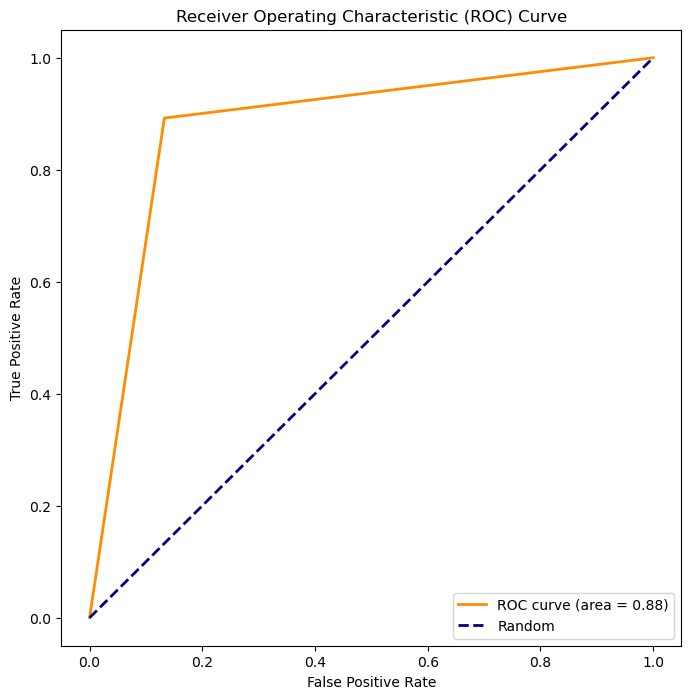

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression

# Generate synthetic data for regression
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Convert the regression problem to a binary classification problem
# For example,  set a threshold to classify as positive or negative
threshold = 0.5
y_binary = (y > threshold).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train a gradient boosting regressor 
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Get predicted values
y_pred = model.predict(X_test)

# Convert predicted values to binary predictions based on the threshold
y_binary_pred = (y_pred > threshold).astype(int)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_binary_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


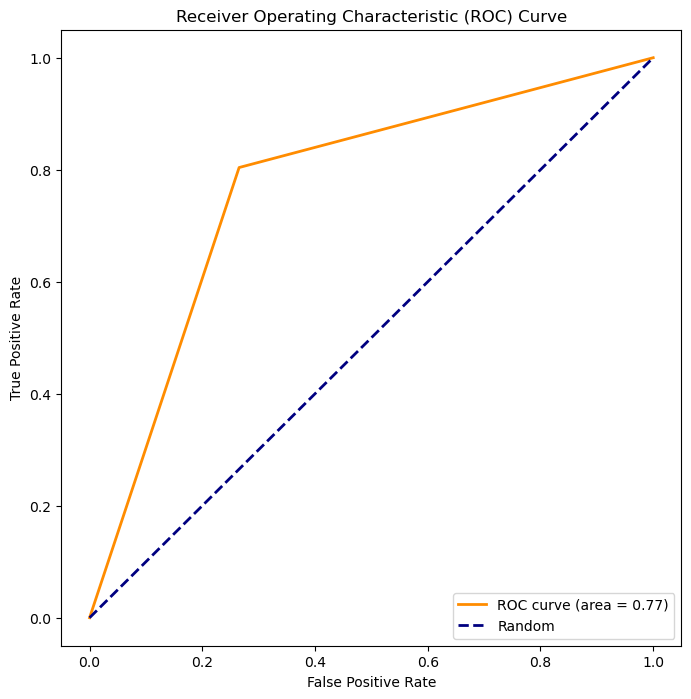

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression

# Generate synthetic data for regression
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Convert the regression problem to a binary classification problem
# For example,  set a threshold to classify as positive or negative
threshold = 0.5
y_binary = (y > threshold).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor 
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Get predicted values
y_pred = model.predict(X_test)

# Convert predicted values to binary predictions based on the threshold
y_binary_pred = (y_pred > threshold).astype(int)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_binary_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

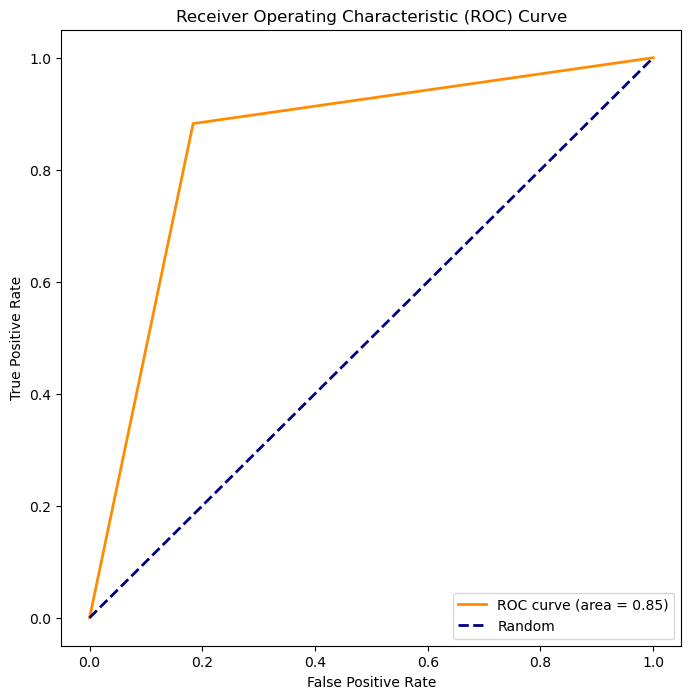

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Generate synthetic data for regression
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Convert the regression problem to a binary classification problem
# For example, set a threshold to classify as positive or negative
threshold = 0.5
y_binary = (y > threshold).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Get predicted values
y_pred = model.predict(X_test)

# Convert predicted values to binary predictions based on the threshold
y_binary_pred = (y_pred > threshold).astype(int)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_binary_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import make_classification

# Generate synthetic data for classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)
y_pred_logistic = logistic_classifier.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Decision Tree
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)
y_pred_tree = tree_classifier.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Random Forest
forest_classifier = RandomForestClassifier()
forest_classifier.fit(X_train, y_train)
y_pred_forest = forest_classifier.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)

# Gradient Boosting
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Display results
print(f'Logistic Regression Accuracy: {accuracy_logistic}')
print(f'Decision Tree Accuracy: {accuracy_tree}')
print(f'Random Forest Accuracy: {accuracy_forest}')
print(f'Gradient Boosting Accuracy: {accuracy_gb}')


Logistic Regression Accuracy: 0.855
Decision Tree Accuracy: 0.865
Random Forest Accuracy: 0.89
Gradient Boosting Accuracy: 0.915


In [17]:
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import make_classification

# Generate synthetic data for classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)
y_pred_logistic = logistic_classifier.predict(X_test)
precision_logistic = precision_score(y_test, y_pred_logistic)

# Decision Tree
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)
y_pred_tree = tree_classifier.predict(X_test)
precision_tree = precision_score(y_test, y_pred_tree)

# Random Forest
forest_classifier = RandomForestClassifier()
forest_classifier.fit(X_train, y_train)
y_pred_forest = forest_classifier.predict(X_test)
precision_forest = precision_score(y_test, y_pred_forest)

# Gradient Boosting
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)
precision_gb = precision_score(y_test, y_pred_gb)

# Display results
print(f'Logistic Regression Precision: {precision_logistic}')
print(f'Decision Tree Precision: {precision_tree}')
print(f'Random Forest Precision: {precision_forest}')
print(f'Gradient Boosting Precision: {precision_gb}')


Logistic Regression Precision: 0.9148936170212766
Decision Tree Precision: 0.8888888888888888
Random Forest Precision: 0.9479166666666666
Gradient Boosting Precision: 0.968421052631579


In [20]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate synthetic data for regression
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_linear = linear_regressor.predict(X_test)
mape_linear = np.mean(np.abs((y_test - y_pred_linear) / y_test)) * 100

# Decision Tree Regressor
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)
y_pred_tree = tree_regressor.predict(X_test)
mape_tree = np.mean(np.abs((y_test - y_pred_tree) / y_test)) * 100

# Random Forest Regressor
forest_regressor = RandomForestRegressor()
forest_regressor.fit(X_train, y_train)
y_pred_forest = forest_regressor.predict(X_test)
mape_forest = np.mean(np.abs((y_test - y_pred_forest) / y_test)) * 100

# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)
y_pred_gb = gb_regressor.predict(X_test)
mape_gb = np.mean(np.abs((y_test - y_pred_gb) / y_test)) * 100

# Display results
print(f'Linear Regression MAPE: {mape_linear:.2f}%')
print(f'Decision Tree MAPE: {mape_tree:.2f}%')
print(f'Random Forest MAPE: {mape_forest:.2f}%')
print(f'Gradient Boosting MAPE: {mape_gb:.2f}%')


Linear Regression MAPE: 0.19%
Decision Tree MAPE: 1060.30%
Random Forest MAPE: 463.11%
Gradient Boosting MAPE: 430.68%
